# Implementation
In this section we will go over the flow of the program, stepping through the coding pipeline. The overall structure of the program looks like this:


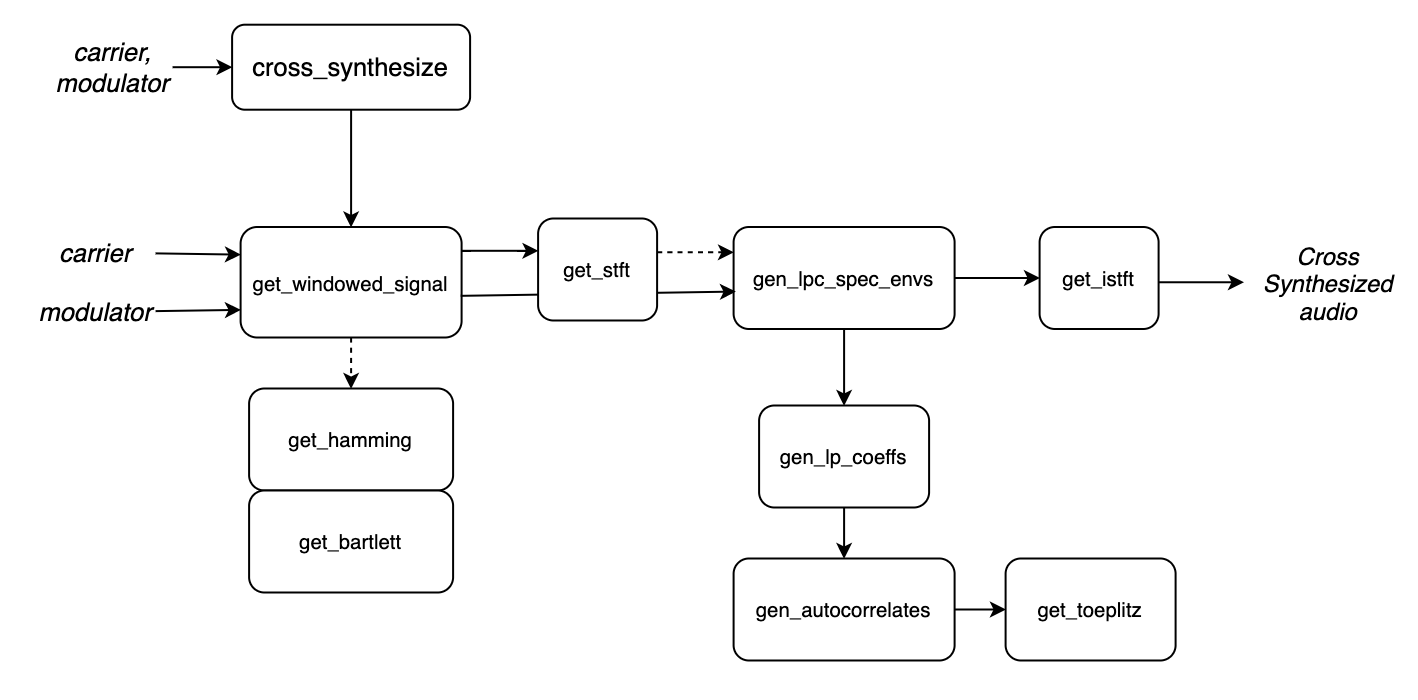

We pass the carrier and modulator audio files to <b>cross_synthesize</b> along with a specified number of linear coefficients, window size, hop size, window function, and booleans for flattening the carrier spectrum and showing spectrograms at each step. <b>cross_synthesize</b> calls the subsequent functions. A conceptual diagram of the flow of  <b>cross_synthesize</b> is as follows:

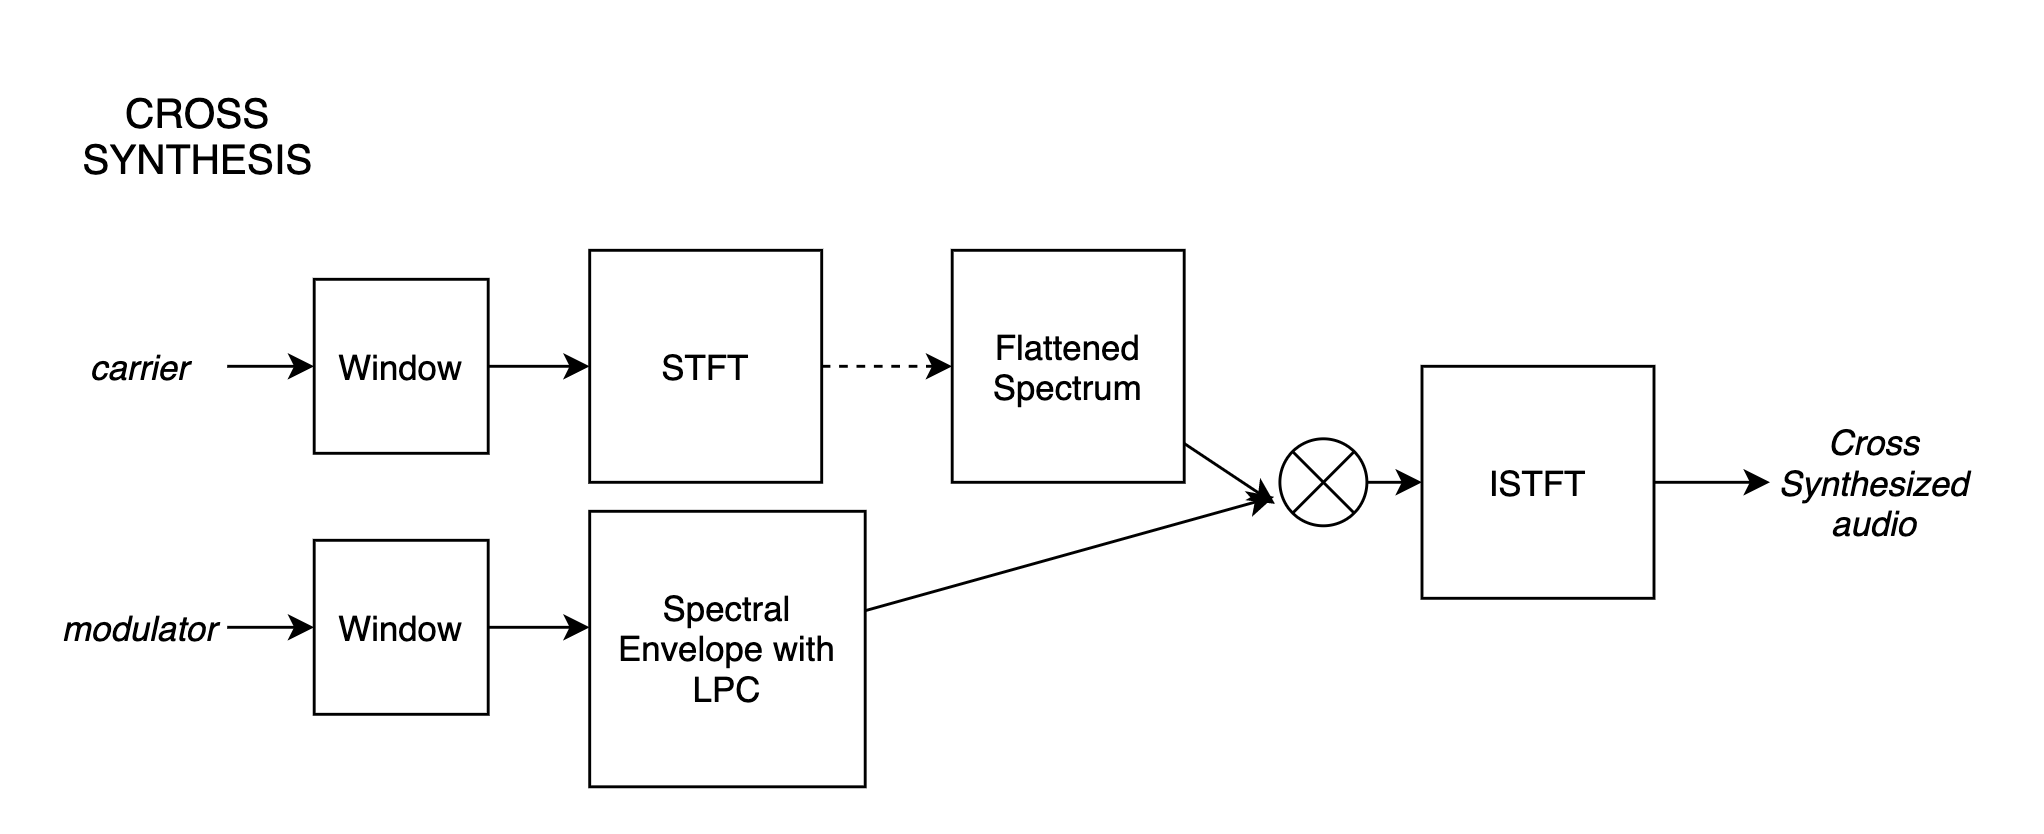

We extract the spectral envelope of the windowed modulator signal and  multiply this by the (optionally flattened) spectrum of the carrier signal. This will impress the envelope of the modulator to the spectrum of the carrier. We take the inverse STFT of this modified spectrum resulting in the cross synthesized audio. 

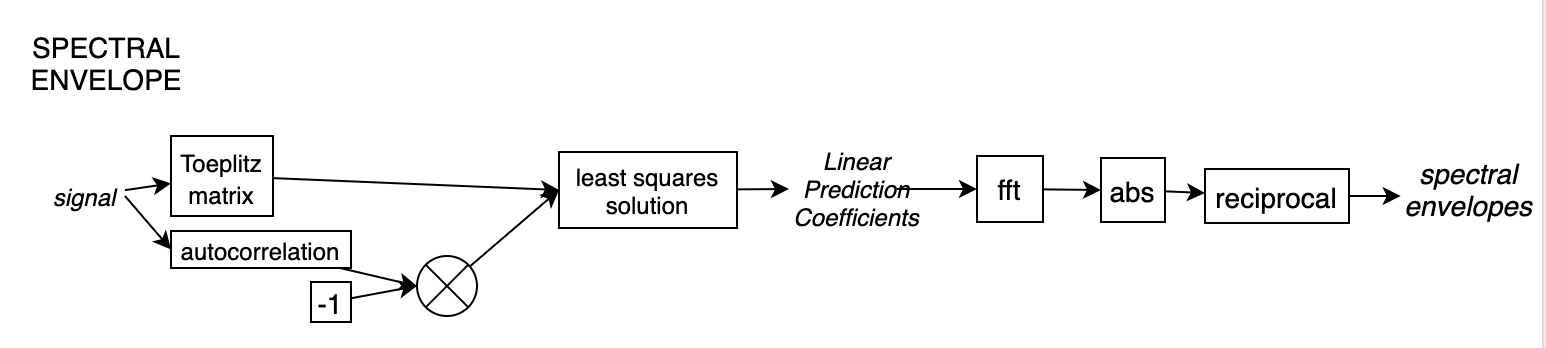

To extract the spectral envelope of the signal we take the M x M Toeplitz matrix of the signal for M linear coefficients and the autocorrelation vector $r_x$. We solve the system of linear equations produced by $a = R/r$ where a is the vector of linear coefficients, R is the Toeplitz matrix and r is the autocorrelation vector. We use <b>np.linalg.lstsq</b> to solve for $a$. 

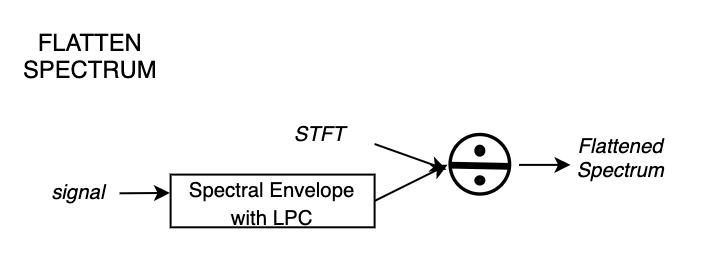

Optionally, we can flatten the spectrum of the carrier, which is done dividing the carrier spectrum by the carrier's spectral envelope.

# Results
Our process successfully performs cross synthesis on two audio signals.
For best cross synthesis, we use M=6 for the number of linear coefficients for generating spectral envelopes. 

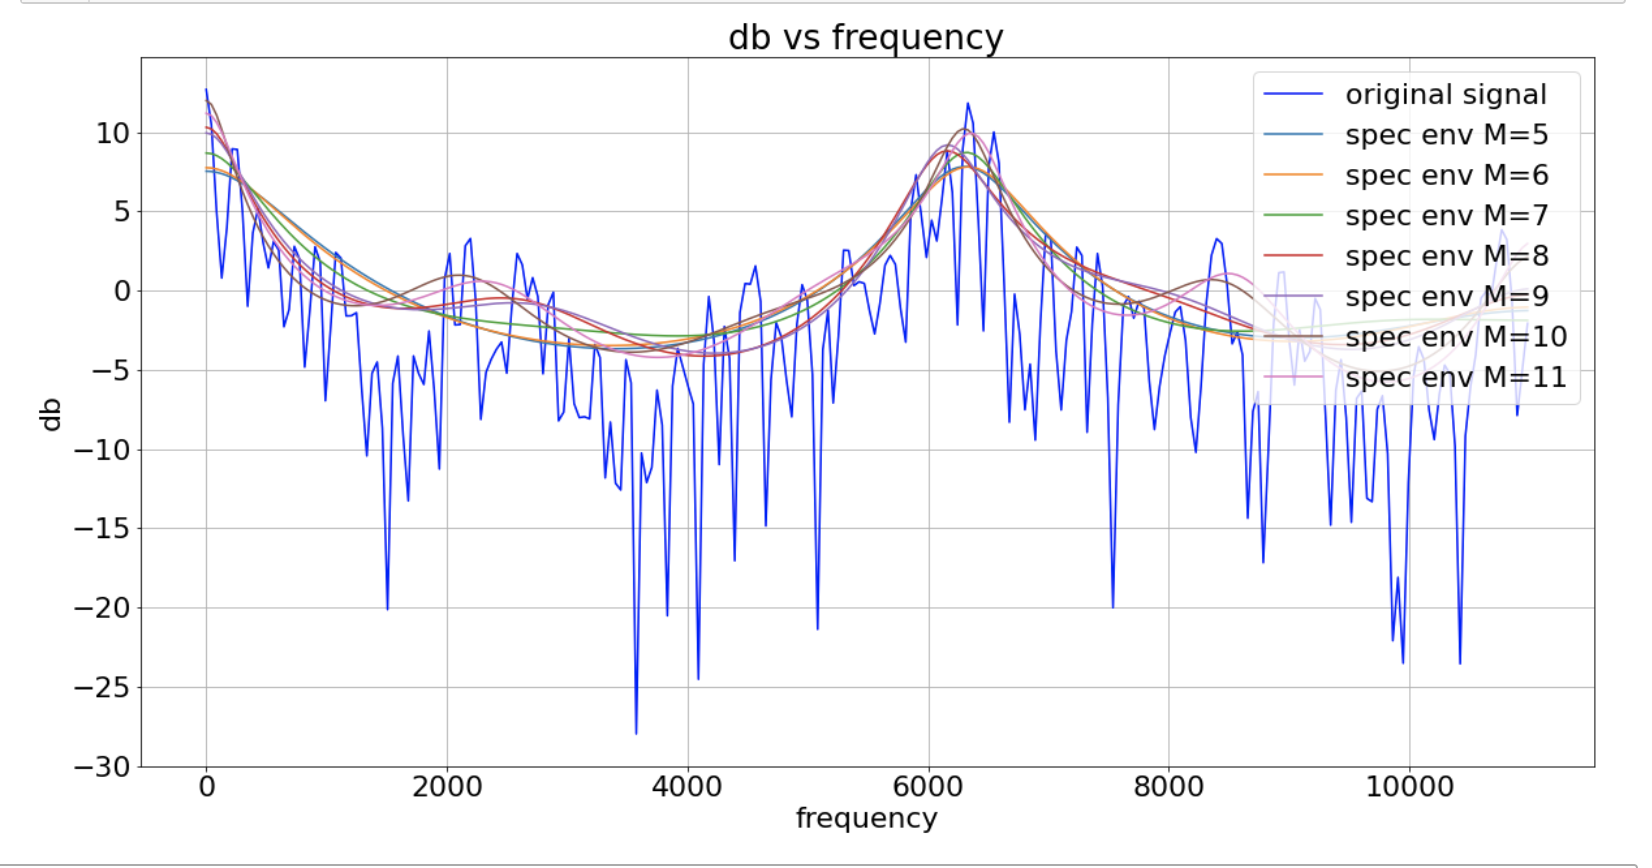

### Spectral Flattening

We found that flattening the carrier spectrum by its spectral envelope improves the quality of our cross-synthesized audio. Below shows the effect of flattening the carrier spectrum. The two spectrograms display the cross synthesized spectrum of an organ (carrier) sound and a male voice (modulator). The top graph is without flattening the carrier and the bottom graph shows with flattening. 

**Carrier without Flattening**
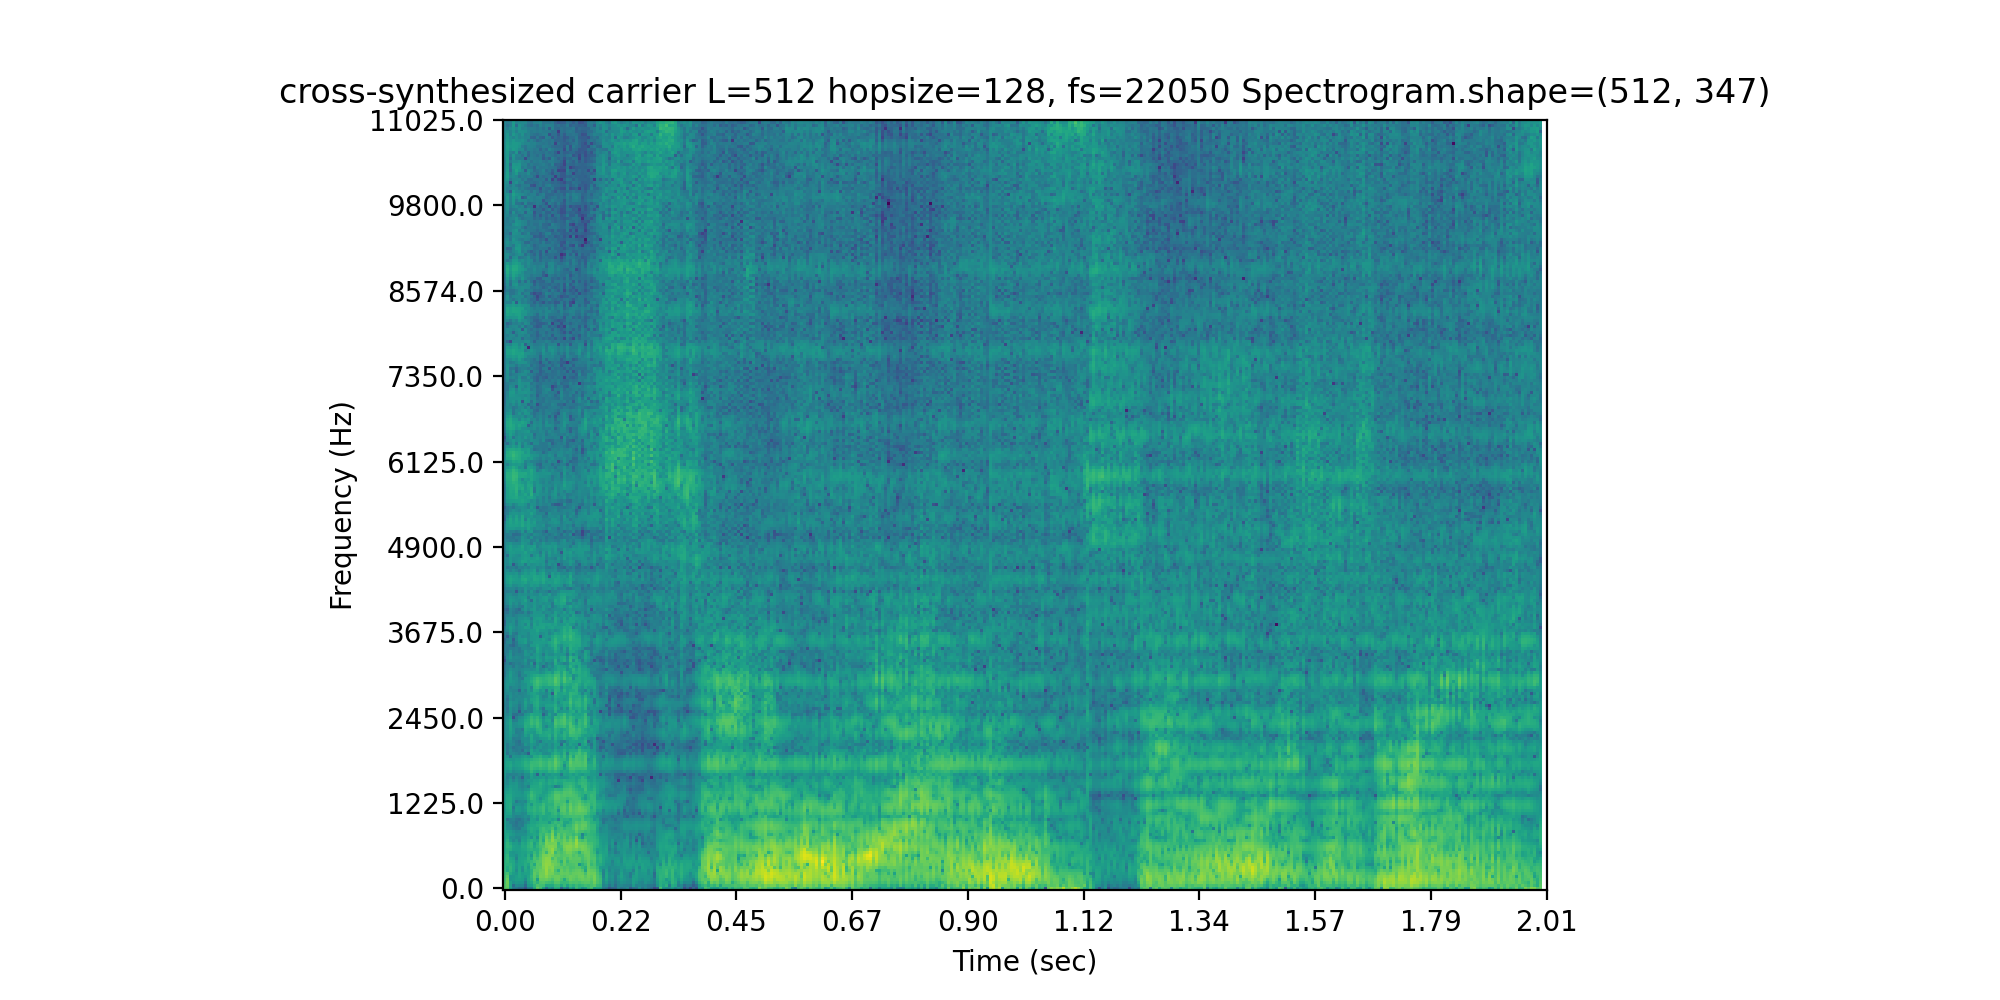 
**Carrier with Flattening**
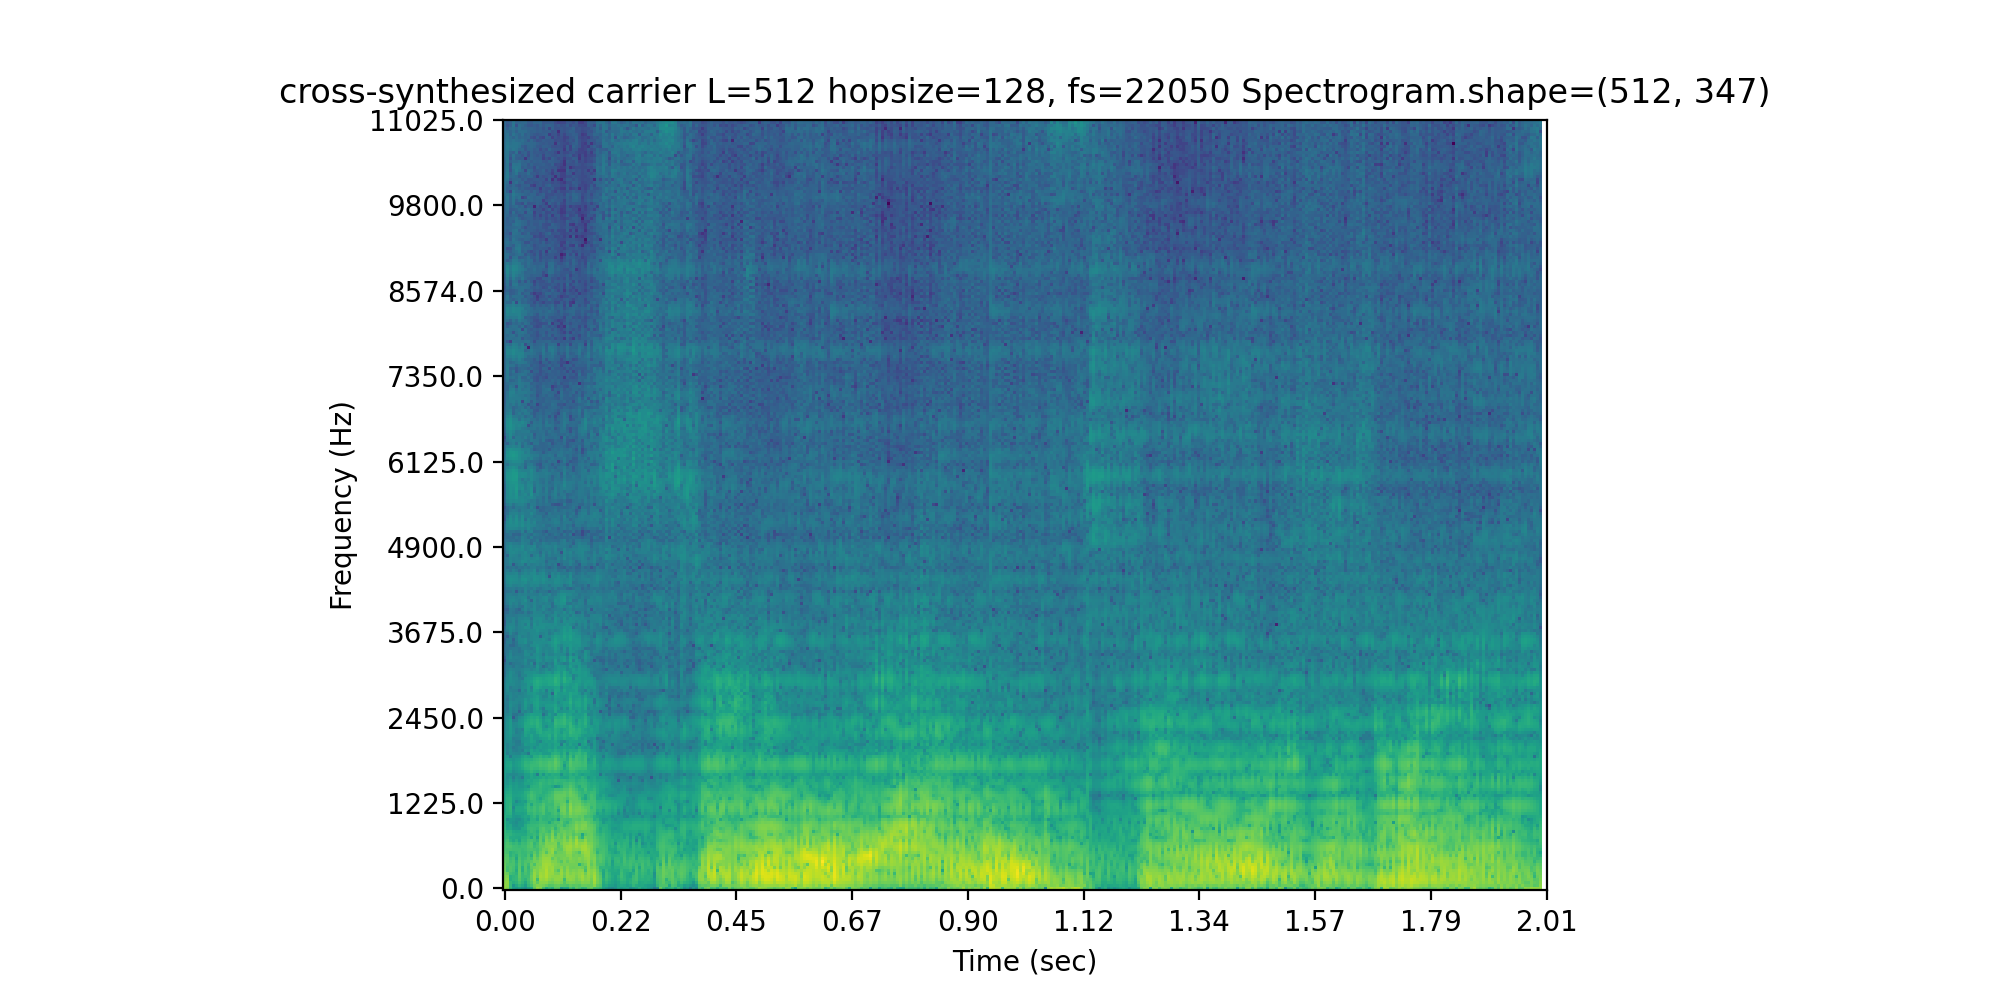

### Testing Various Window Functions

Using a window function on our signals increases the quality of our cross-synthesized audio. Below shows the spectrum of our cross-synthesized signal with no window, a Bartlett window, and a Hanning window with a flattened carrier. We noticed through trying various modulator/carrier combinations that the Bartlett window sounds best, and rectangular window the worst.

We noticed that cross-synthesizing with a rectangular window resulted in a lot of clips / noise artifacts. We suspect this is because the rectangular window has such a shallow rolloff, resulting in the generation of many artificial frequency peaks during cross-synthesis.

**No Window**
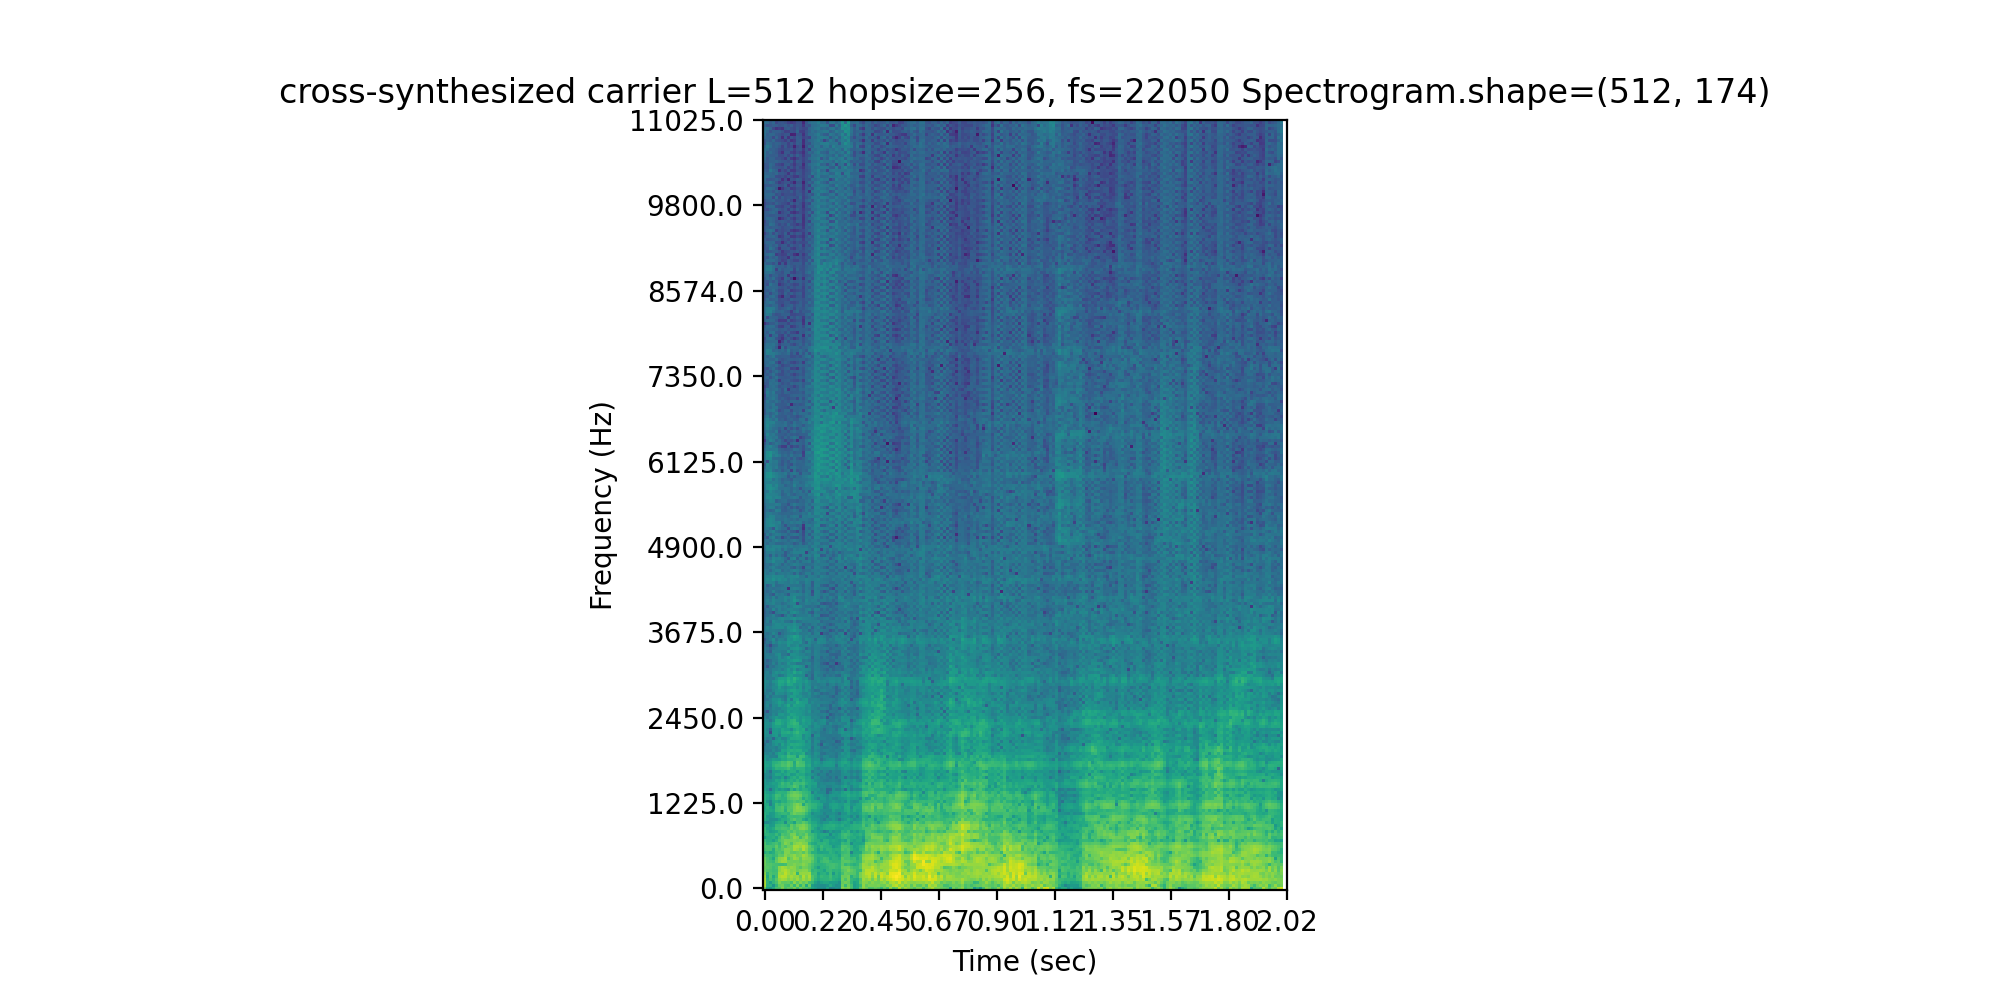
**Bartlett Window**
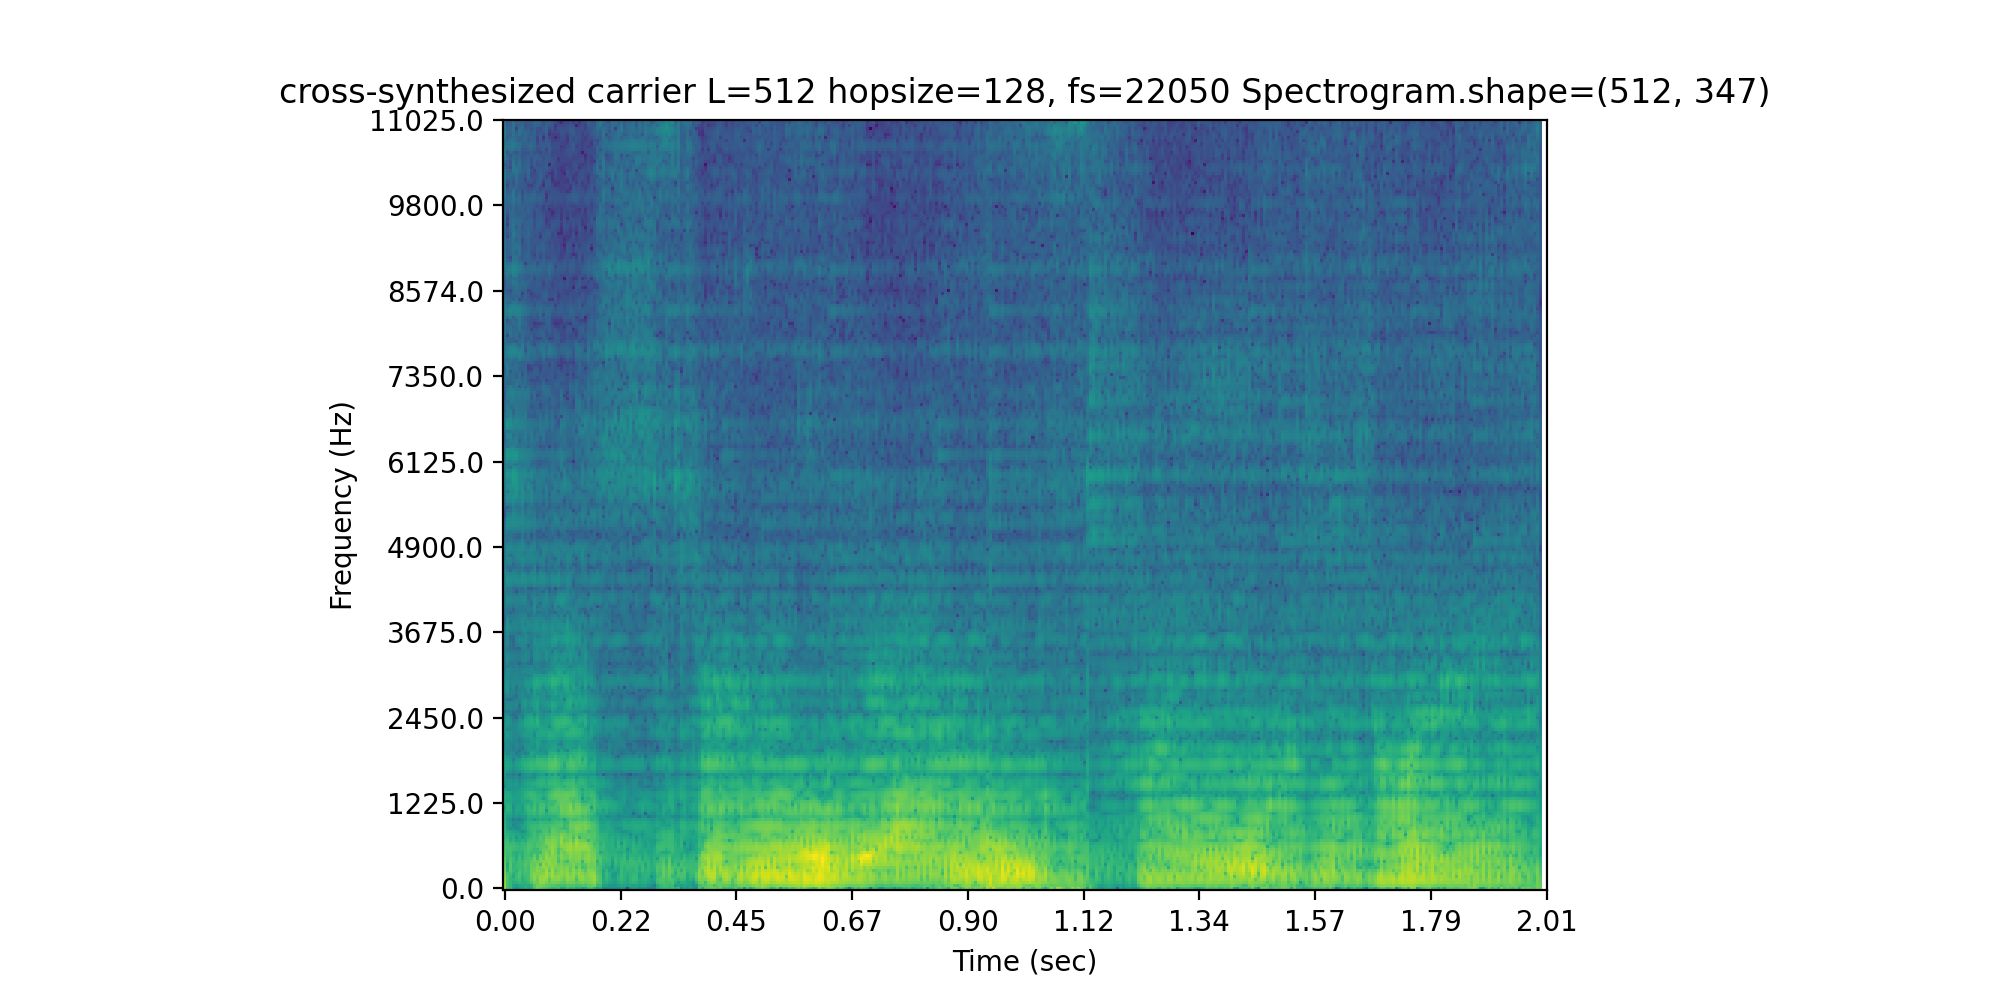
**Hanning Window**
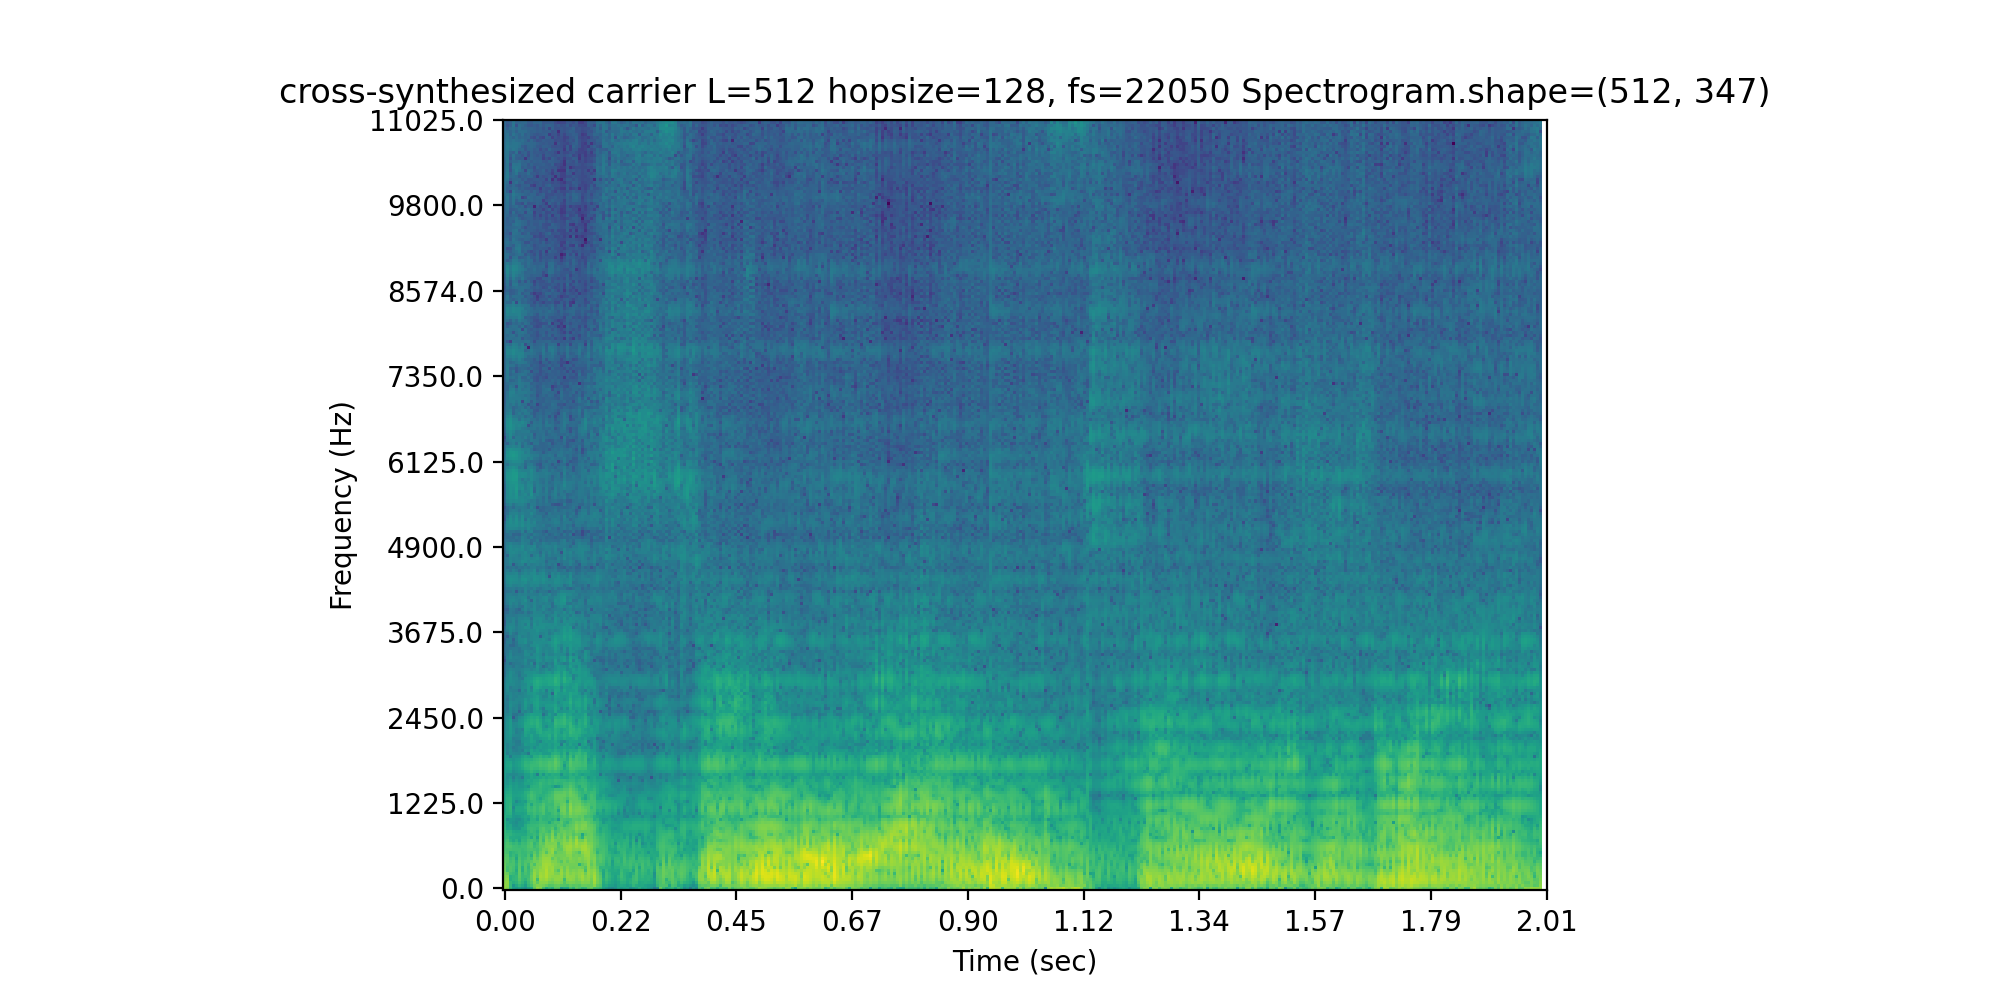